# Multiple Linear Regression

## Problem Statement

Using Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

In [1]:
import pandas as pd
import seaborn as sns
petrol_df = pd.read_csv('petrol.csv');
petrol_df.columns = ((petrol_df.columns.str).replace("^ ","")).str.replace(" $","")
print(petrol_df.describe());

             tax       income       highway         dl  consumption
count  48.000000    48.000000     48.000000  48.000000    48.000000
mean    7.668333  4241.833333   5565.416667   0.570333   576.770833
std     0.950770   573.623768   3491.507166   0.055470   111.885816
min     5.000000  3063.000000    431.000000   0.451000   344.000000
25%     7.000000  3739.000000   3110.250000   0.529750   509.500000
50%     7.500000  4298.000000   4735.500000   0.564500   568.500000
75%     8.125000  4578.750000   7156.000000   0.595250   632.750000
max    10.000000  5342.000000  17782.000000   0.724000   968.000000


# Question 2 - Cap outliers 

(Used (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is to consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [8]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    minimum_cap  = q1- (1.5*iqr)
    maximum_cap  = q3+ (1.5*iqr)
    for index, row in df_in.iterrows():
        if row[col_name] < minimum_cap or row[col_name] > maximum_cap:
            print("Outlier exists for",col_name," on row",index, "with value:", row[col_name],"With min val",minimum_cap," and max val",maximum_cap)
            df_in.drop(index,axis=0)
    df_in = df_in.loc[(df_in[col_name] > minimum_cap) & (df_in[col_name] < maximum_cap)]
    return df_in

df_modified = remove_outlier(petrol_df,'tax')
df_modified = remove_outlier(df_modified,'income')
df_modified = remove_outlier(df_modified,'highway')
df_modified = remove_outlier(df_modified,'dl')
print(df_modified.shape)
print(df_modified)

Outlier exists for tax  on row 5 with value: 10.0 With min val 5.3125  and max val 9.8125
Outlier exists for tax  on row 36 with value: 5.0 With min val 5.3125  and max val 9.8125
Outlier exists for highway  on row 11 with value: 14186.0 With min val -2062.5  and max val 12315.5
Outlier exists for dl  on row 18 with value: 0.7240000000000001 With min val 0.4220000000000001  and max val 0.71
(44, 5)
     tax  income  highway     dl  consumption
0   9.00    3571     1976  0.525          541
1   9.00    4092     1250  0.572          524
2   9.00    3865     1586  0.580          561
3   7.50    4870     2351  0.529          414
4   8.00    4399      431  0.544          410
6   8.00    5319    11868  0.451          344
7   8.00    5126     2138  0.553          467
8   8.00    4447     8577  0.529          464
9   7.00    4512     8507  0.552          498
10  8.00    4391     5939  0.530          580
12  7.00    4817     6930  0.574          525
13  7.00    4207     6580  0.545          508


# Independent variables and collinearity

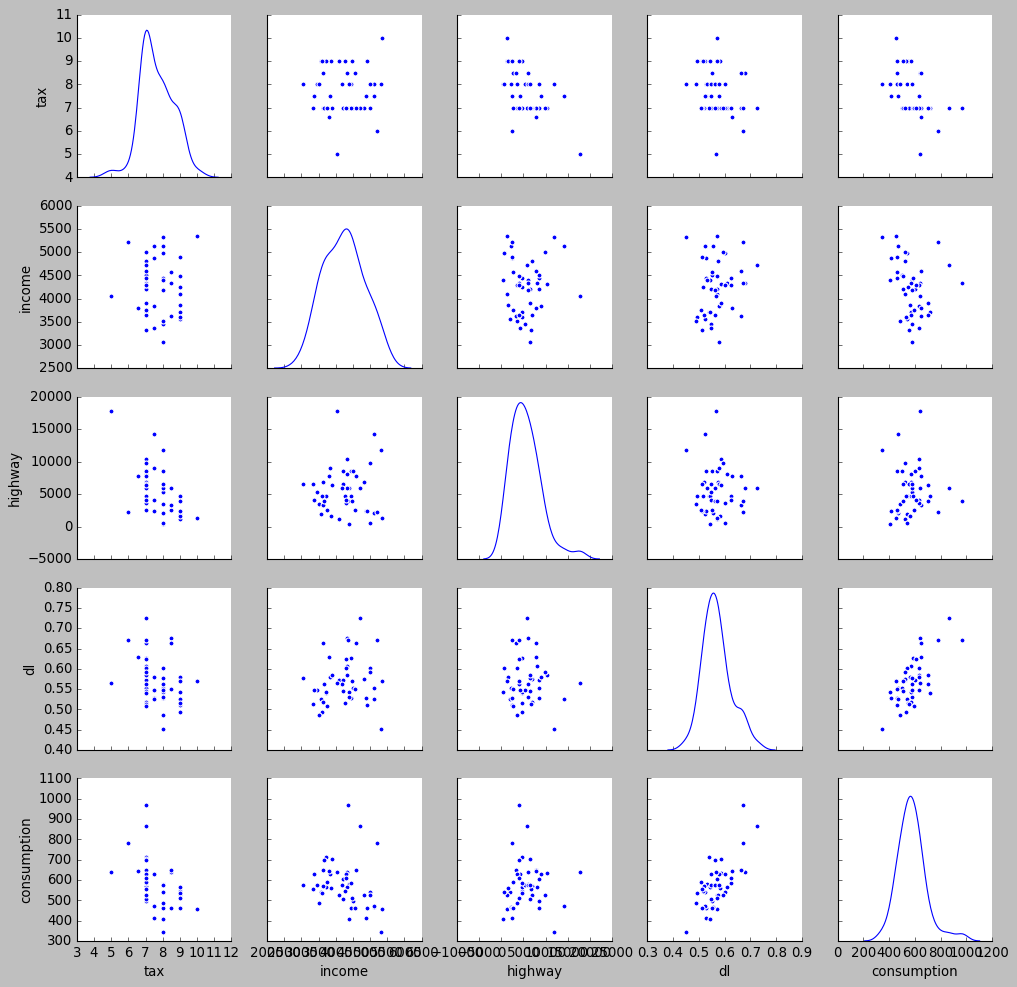

In [250]:
sns.pairplot(petrol_df, diag_kind='kde')

In [243]:
#From the above scatter plot we can observe a positive correlation between drivers and consumption
#negative correlation and income
#There is no correlation between any of the independent variables
df_out.corr()
#From the below values . We can see a postivie correlation for drivers and consumption 
#and negative correlation between tax and consumption. I will consider correlation values 
#which are greater than 0.3.So I will drop income and highway columns from the data"""

,tax,income,highway,dl,consumption
tax,1.000000,-0.114112,-0.377039,-0.336725,-0.435857
income,-0.114112,1.000000,0.047897,0.156552,-0.258139
highway,-0.377039,0.047897,1.000000,-0.037244,-0.013456
dl,-0.336725,0.156552,-0.037244,1.000000,0.651939
consumption,-0.435857,-0.258139,-0.013456,0.651939,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [251]:
#Dropping income,highway as they are not strongly corelated to the dependent variable consumption, so dropping them
petrol_df_transformed = df_out.drop(petrol_df.iloc[:,1:3],axis=1)
petrol_df_transformed.head()

,tax,dl,consumption
0,9.0,0.525,541
1,9.0,0.572,524
2,9.0,0.580,561
3,7.5,0.529,414
4,8.0,0.544,410


# Split data into train, test sets 
Divided the data into training and test sets with 80-20 split using scikit-learn. 

In [252]:
#Assigning X with the independent variables
X = petrol_df_transformed.drop(petrol_df_transformed.iloc[:,2:3],axis=1)
#Assigning y with the dependent variables
y = petrol_df_transformed.drop(petrol_df_transformed.iloc[:,0:2],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Build Model 

In [253]:
from sklearn.linear_model import LinearRegression

#Building the model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
#Intercept of the model
intercept = regression_model.intercept_[0]
print('Intercept of the model',intercept)

The coefficient for tax is -30.636448617551032
The coefficient for dl is 1031.7205278024148
Intercept of the model 210.28625033543057


# R-Square 

# Evaluate the model 
Calculate the accuracy score for the above model.

In [256]:
print('R^2 value of training data',regression_model.score(X_train, y_train))
print('R^2 value of test data',regression_model.score(X_test, y_test))

R^2 value of training data 0.4960514877569218
R^2 value of test data 0.29069607745076476


# Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [258]:
X = df_out.drop(petrol_df.iloc[:,4:5],axis=1)
y = df_out.drop(petrol_df.iloc[:,0:4],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [259]:
print('R^2 value of training data after adding income and highway variables',regression_model.score(X_train, y_train))
print('R^2 value of test data after adding income and highway variables',regression_model.score(X_test, y_test))

R^2 value of training data after adding income and highway variables 0.6527361103320543
R^2 value of test data after adding income and highway variables 0.370591478030594


# Print the coefficients of the multilinear regression model

In [260]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for tax is -44.803702910012305
The coefficient for income is -0.05911165614266379
The coefficient for highway is -0.003223889863727351
The coefficient for dl is 1330.7964722937324


In [ ]:
By observing the above values R-sqaure value after adding highway and income the model is able to fit the model even more better